<h1 style="color:blue;font-weight:bold">Ahmed Naseem<br>Data Science with Artificial Intelligence<br>Batch 5<br>Exam: Deep Learning</h1>

<h2 style="color:green;font-weight:bold;font-style:italic">SECTION 5</h2>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb


In [2]:
# Load IMDB dataset
max_features = 10000  # Number of words to consider
maxlen = 100  # Maximum length of each input sequence

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model.add(SimpleRNN(64, return_sequences=True))  # You can change this to SimpleRNN, LSTM, or GRU
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [4]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 43ms/step - accuracy: 0.7160 - loss: 0.5333 - val_accuracy: 0.8256 - val_loss: 0.3764
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.8886 - loss: 0.2725 - val_accuracy: 0.8368 - val_loss: 0.3680
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9170 - loss: 0.2181 - val_accuracy: 0.8314 - val_loss: 0.3907
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 42ms/step - accuracy: 0.9332 - loss: 0.1743 - val_accuracy: 0.8192 - val_loss: 0.4492
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 41ms/step - accuracy: 0.9470 - loss: 0.1407 - val_accuracy: 0.8188 - val_loss: 0.5048


In [5]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8183 - loss: 0.5193
Test Loss: 0.5258, Test Accuracy: 0.8155


In [6]:
import matplotlib.pyplot as plt


In [7]:
# Train the model and save the history
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 57ms/step - accuracy: 0.9550 - loss: 0.1298 - val_accuracy: 0.8160 - val_loss: 0.5180
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9702 - loss: 0.0860 - val_accuracy: 0.8108 - val_loss: 0.6235
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.9829 - loss: 0.0557 - val_accuracy: 0.8048 - val_loss: 0.7798
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.9865 - loss: 0.0449 - val_accuracy: 0.8086 - val_loss: 0.7175
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 42ms/step - accuracy: 0.9914 - loss: 0.0296 - val_accuracy: 0.8070 - val_loss: 0.8327


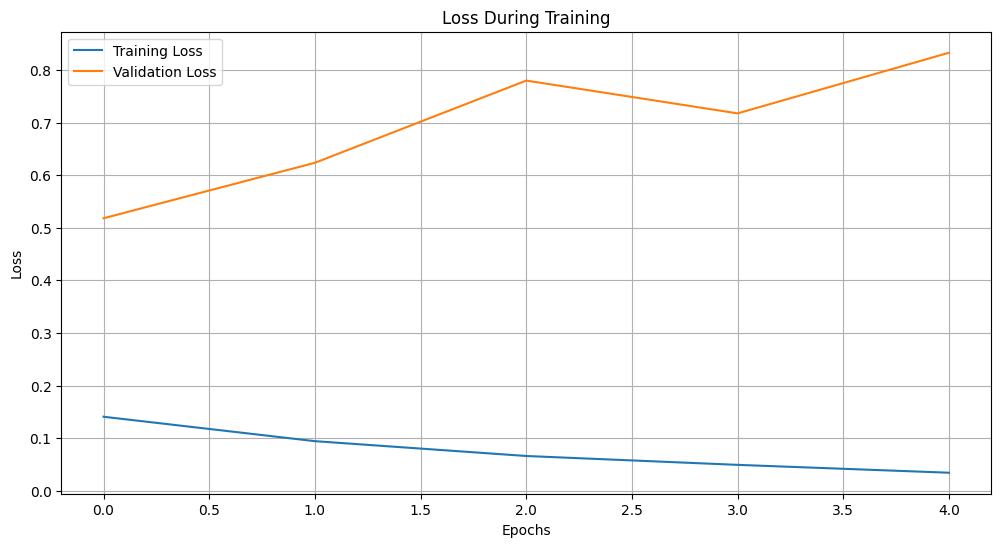

In [8]:
# Plotting the loss graph
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.7077 - loss: 0.5556 - val_accuracy: 0.8354 - val_loss: 0.3786
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 42ms/step - accuracy: 0.8909 - loss: 0.2842 - val_accuracy: 0.8358 - val_loss: 0.3628
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9191 - loss: 0.2139 - val_accuracy: 0.8274 - val_loss: 0.3907
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.9304 - loss: 0.1842 - val_accuracy: 0.8202 - val_loss: 0.4481
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 44ms/step - accuracy: 0.9507 - loss: 0.1420 - val_accuracy: 0.8112 - val_loss: 0.5098


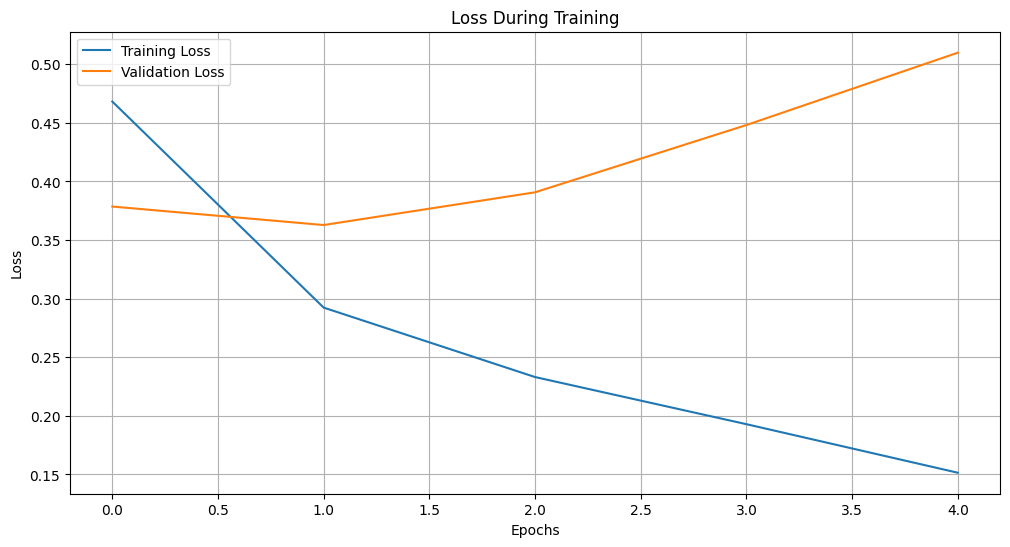

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

# Load IMDB dataset
max_features = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model.add(SimpleRNN(64, return_sequences=True))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

# Plotting the loss graph
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
